In [3]:
! pip install pandas
! pip install numpy
! pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.5 MB)
Using cached pillow-10.4.0-cp312-cp312-manylinux_2_28_x86_64.whl (4.5 MB)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Load the CSV file
file_path = './results/speedup.csv'  
data = pd.read_csv(file_path)   

method  size  on-demand
seq     1024  0             0.317334
        2048  0             2.498846
        4096  0            19.156320
        1024  0             0.253153
        2048  0             1.745412
        4096  0            13.718687
        1024  0             0.255045
        2048  0             1.979439
        4096  0            14.088795
Name: time, dtype: float64
on-demand
0    0.317334
0    0.253153
0    0.255045
Name: time, dtype: float64
on-demand
0    0.317334
0    0.253153
0    0.255045
Name: time, dtype: float64
on-demand
0    0.317334
0    0.253153
0    0.255045
Name: time, dtype: float64
on-demand
0    0.317334
0    0.253153
0    0.255045
Name: time, dtype: float64
on-demand
0    0.317334
0    0.253153
0    0.255045
Name: time, dtype: float64
on-demand
0    0.317334
0    0.253153
0    0.255045
Name: time, dtype: float64
on-demand
0    0.317334
0    0.253153
0    0.255045
Name: time, dtype: float64
on-demand
0    2.498846
0    1.745412
0    1.979439
Name: time,

/tmp/ipykernel_132827/1864974644.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  seq_time = sequential_times.get(('seq', size), None)


ValueError: setting an array element with a sequence.

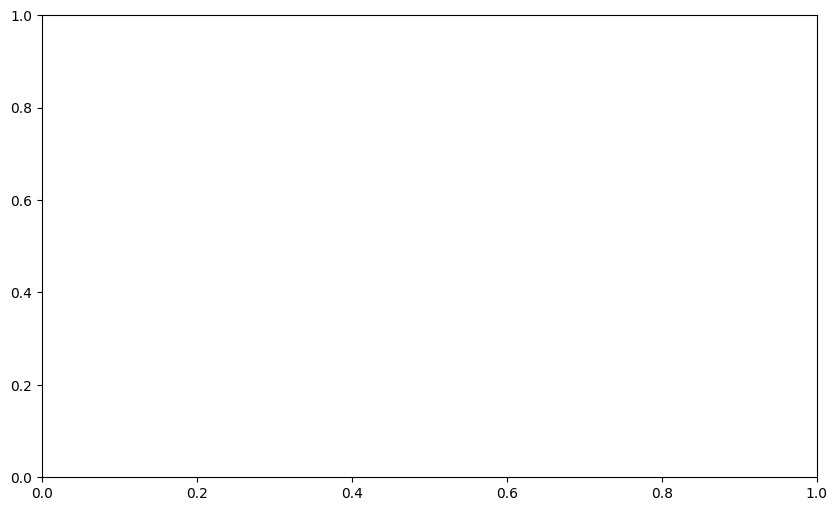

In [13]:
# Calculate Scalability and Efficiency
scalability = []
efficiency = []

# Assuming the sequential method is labeled as 'seq'
sequential_times = data[data['method'] == 'seq'].set_index(['method', 'size', 'on-demand'])['time']
print(sequential_times)

for index, row in data.iterrows():
    method, size, w, on_demand, time = row['method'], row['size'], row['#w'], row['on-demand'], row['time']
    
    if w >= 1:
        seq_time = sequential_times.get(('seq', size), None)
        print(seq_time)
        
        if seq_time is not None:
            # Scalability: time of the sequential method / time of the parallel method
            scale = seq_time / time
            scalability.append(scale)
            
            # Efficiency: (sequential method time / #w) / parallel time
            eff = (seq_time / w) / time
            efficiency.append(eff)
        else:
            scalability.append(None)
            efficiency.append(None)
    else:
        scalability.append(None)
        efficiency.append(None)

# Add the new columns to the dataframe
data['scalability'] = scalability
data['efficiency'] = efficiency

# Plotting
for metric in ['scalability', 'efficiency']:
    plt.figure(figsize=(10, 6))
    for method in data['method'].unique():
        if method != 'seq':  # Exclude the sequential method from the plot
            subset = data[(data['method'] == method) & (data['#w'] >= 1)]
            plt.plot(subset['#w'], subset[metric], marker='o', label=method)
        
    plt.title(f'{metric.capitalize()} vs Number of Workers (#w)')
    plt.xlabel('Number of Workers (#w)')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Filter data by method
seq_data = data[data['method'] == 'seq']
farm_data = data[data['method'] == 'frm']
par_data = data[data['method'] == 'par']


In [11]:
print(seq_data)

    method  size #w on-demand       time speedup
0      seq   128  1         0   0.000486       1
9      seq   256  1         0   0.003517       1
18     seq  1024  1         0   0.215082       1
27     seq   128  1         0   0.000498       1
34     seq   256  1         0   0.003598       1
41     seq  1024  1         0   0.301617       1
48     seq  1024  1         0   0.291173       1
55     seq  2048  1         0   2.452798       1
62     seq  4096  1         0  20.549426       1
70     seq  1024  1         0   0.293132       1
77     seq  2048  1         0   2.586636       1
84     seq  4096  1         0  19.410175       1
92     seq  1024  1         0   0.317334       1
99     seq  2048  1         0   2.498846       1
106    seq  4096  1         0  19.156320       1
114    seq  1024  1         0   0.253153       1
121    seq  2048  1         0   1.745412       1
128    seq  4096  1         0  13.718687       1
136    seq  1024  1         0   0.255045       1
143    seq  2048  1 

In [14]:
print(farm_data.head())


   method size  #w on-demand      time speedup
1     frm  128   4         1  0.001547     .31
3     frm  128   8         1  0.001831     .26
5     frm  128  16         1  3.115908       0
7     frm  128  32         1  5.020015       0
10    frm  256   4         1  0.003480    1.01
